# The project

I'm gonna be working with the MAGIC Gamma Telescope Data Set, which is a 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('magic04.data', names=columns)
df.head()



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [4]:
#Let's convert them to numbers (g=1 and h=0)

df['class'] = (df['class'] == 'g').astype(int)


In [5]:
df.loc[12330, 'class']

1

#### Prediction

Based on the information, I'm gonna predict which class are future particles gonna belong to (either g or h).

In [6]:
df['class'].unique()

array([1, 0])

12332
6688
12332
6688
12332
6688
12332
6688
12332
6688
12332
6688
12332
6688
12332
6688
12332
6688
12332
6688


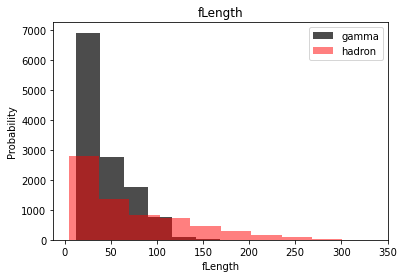

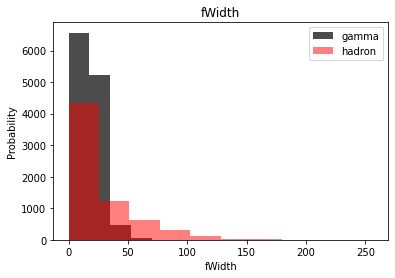

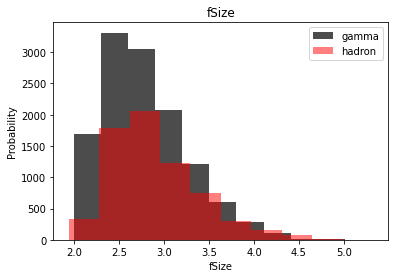

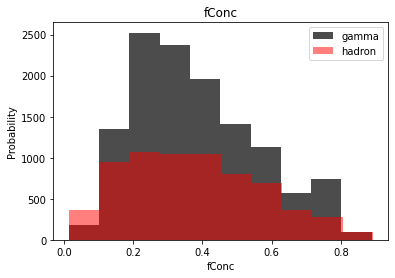

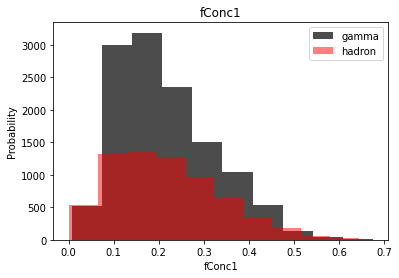

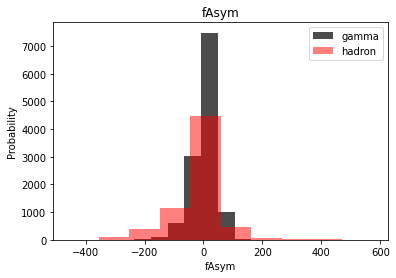

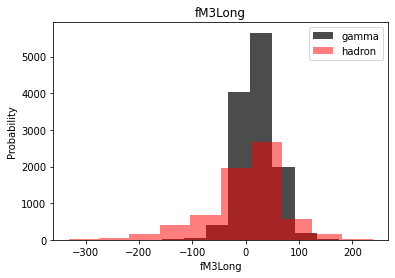

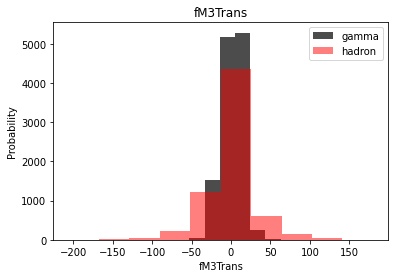

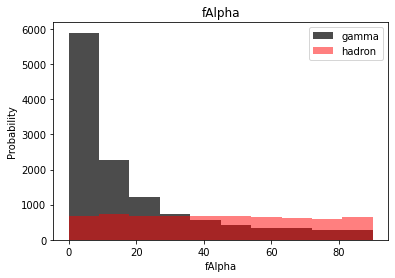

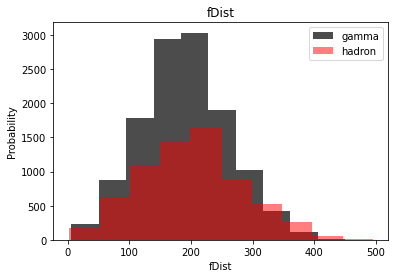

In [7]:
for label in columns[:-1]:
    print(len(df[df['class'] == 1][label]))
    print(len(df[df['class'] == 0][label]))

for label in columns[:-1]:
    plt.hist(df[df['class'] == 1][label], color = 'black', label='gamma', alpha = 0.7, density=False)
    plt.hist(df[df['class'] == 0][label], color = 'red', label='hadron', alpha = 0.5, density=False)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()


# Train, validation and test datasets

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
#Let's scale the columns to smilar scales, so that the different values are not that far from each other.

def scale_dataset(dataframe, oversample = False):

    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()

    x = scaler.fit_transform(x)

    if oversample:

        ros = RandomOverSampler()

        x,y = ros.fit_resample(x, y)

    data = np.hstack((x,np.reshape(y, (-1,1))))

    return data, x, y

In [10]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]))

#There's almost doble the gammas than the hadrons and that may be an issue for
#training the model.

7444
3968


In [11]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)


## First model: K-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_prediction = knn_model.predict(x_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1316
           1       0.87      0.86      0.86      2488

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Second model: Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [18]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.51      1316
           1       0.74      0.91      0.82      2488

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.73      0.73      0.71      3804



# Third model: Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)